<a href="https://colab.research.google.com/github/Neeraj6maths/cardiovascular_disease_prediction/blob/main/ML_Classification_Cardiovascular_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. \

It includes over 4,000 records and 15 attributes. \
 \
Variables   
 \
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors. \
 \
Data Description 
 
Demographic: \
• Sex: male or female("M" or "F") \
• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) \
 \
Behavioral \
• is_smoking: whether or not the patient is a current smoker ("YES" or "NO") \
• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) \

Medical( history) \
• BP Meds: whether or not the patient was on blood pressure medication (Nominal) \
• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal) \
• Prevalent Hyp: whether or not the patient was hypertensive (Nominal) \
• Diabetes: whether or not the patient had diabetes (Nominal) \

Medical(current) \
• Tot Chol: total cholesterol level (Continuous) \
• Sys BP: systolic blood pressure (Continuous) \
• Dia BP: diastolic blood pressure (Continuous) \
• BMI: Body Mass Index (Continuous) \
• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.) \
• Glucose: glucose level (Continuous) \

Predict variable (desired target) \
• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV

In [12]:
# importing all the important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import SVC

In [13]:
# importing the dataset and creating dataframe
df = pd.read_csv("/content/drive/MyDrive/AlmaBetter/capstone projects/Supervised ML - Classification/Cardiovascular risk/Copy of data_cardiovascular_risk.csv")

In [14]:
# taking a look at the data
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [15]:
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [16]:
# getting basic info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [17]:
# getting statistical summary of data
df.describe(include = 'all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


In [18]:
# Checking no. of null values in the data
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [19]:
# checking for duplicate rows
df.duplicated().sum()

0

No duplicate rows are present

#EDA

## Univariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


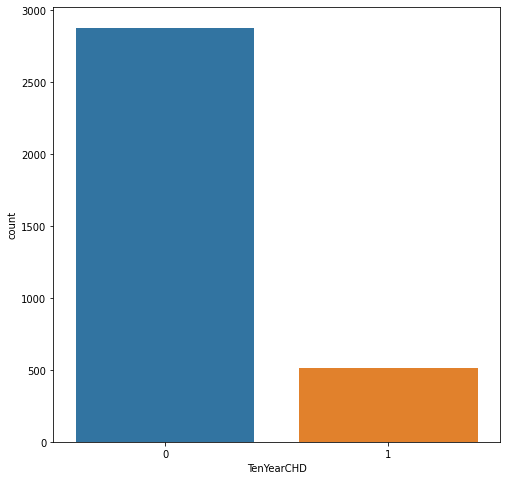

In [24]:
# Plotting the countplot for dependent variable
dep_variable = 'TenYearCHD'
plt.figure(figsize = (8,8))
sbn.countplot(df[dep_variable])
plt.show()

In [25]:
df[dep_variable].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

Given data is highly imbalanced.

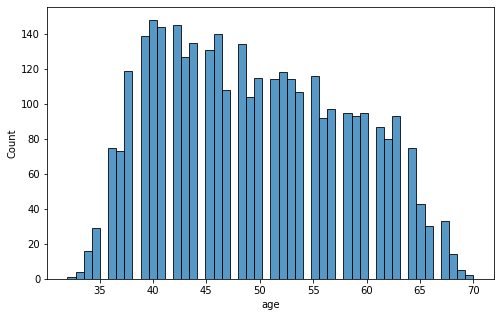

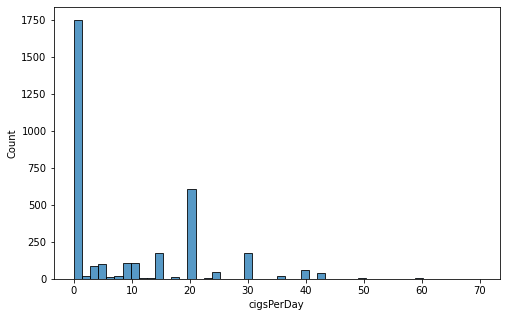

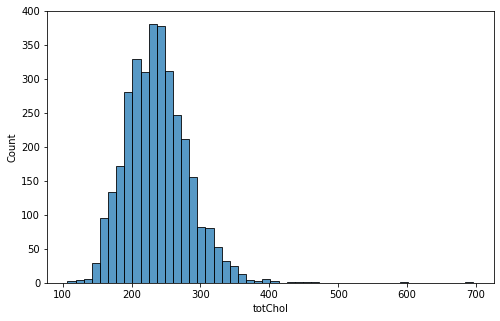

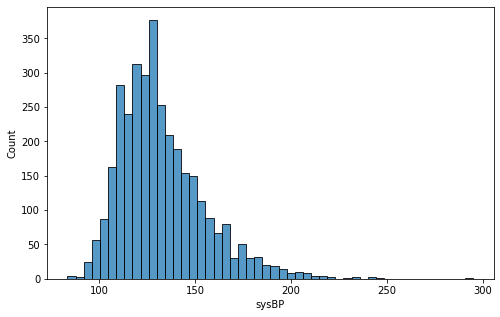

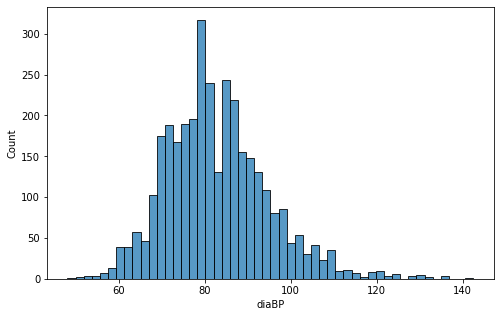

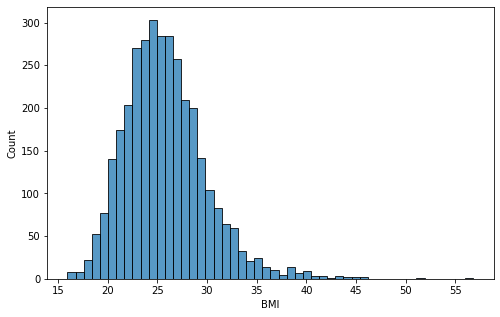

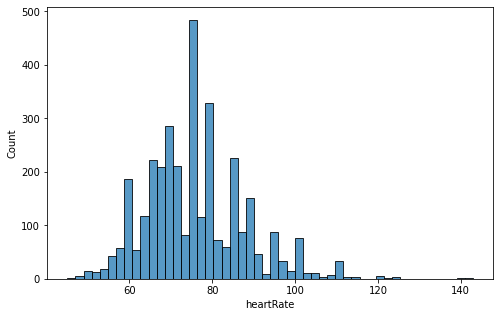

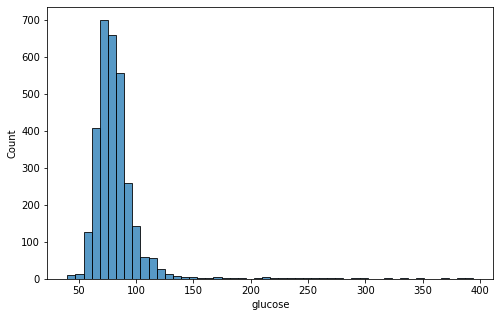

In [20]:
# Plotting distribution of values of cts numerical features
cts_features = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']
for col in cts_features:
  plt.figure(figsize = (8,5))
  sbn.histplot(df[col], bins = 50)

Most of the numerical features are positively skewed.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


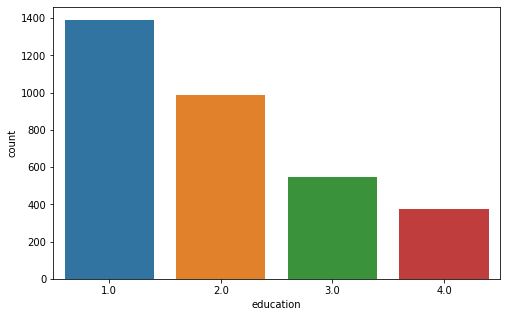

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


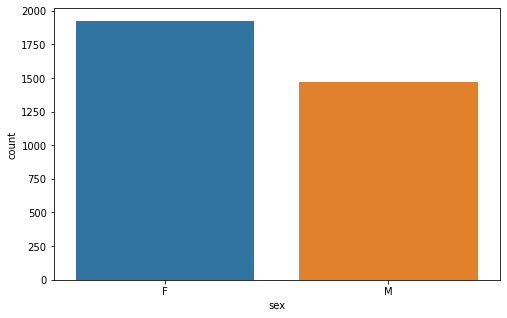

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


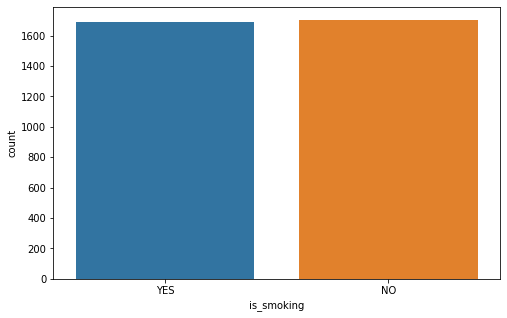

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


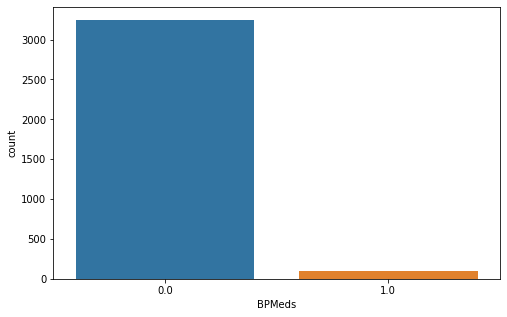

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


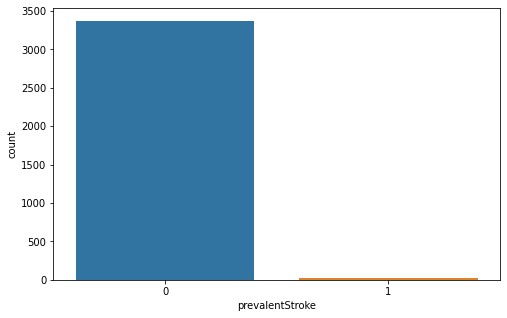

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


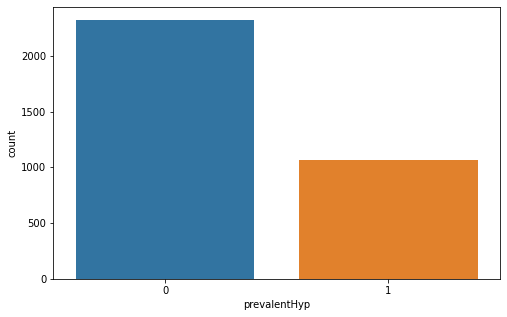

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


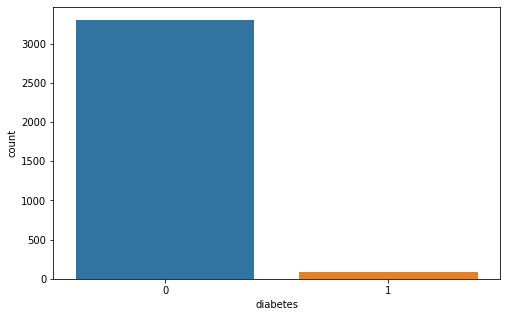

In [22]:
# plotting the count plot of categorical features
cat_features = ['education','sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes']
for col in cat_features:
  plt.figure(figsize = (8,5))
  sbn.countplot(df[col])
  plt.show()

Input features like 'diabetes', 'prevalentStroke' and 'BPMeds' are highly imbalanced.

## Bivariate analysis

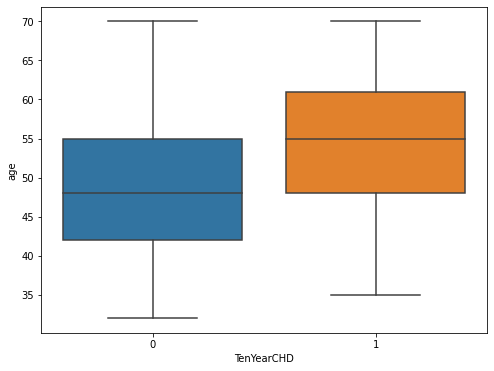

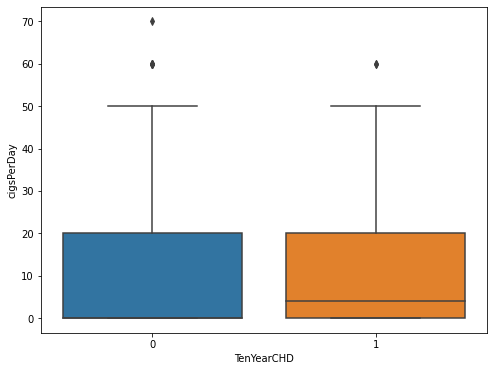

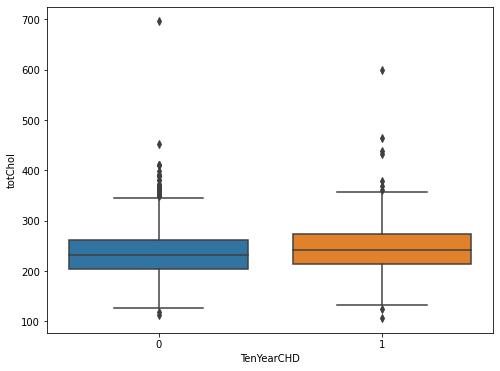

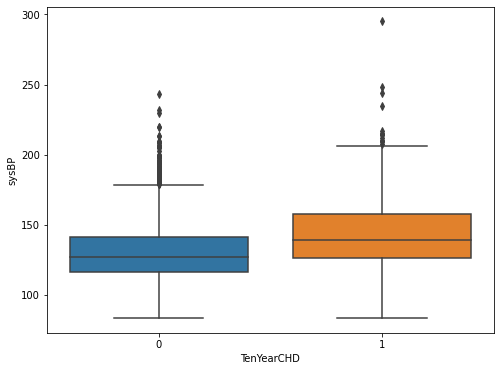

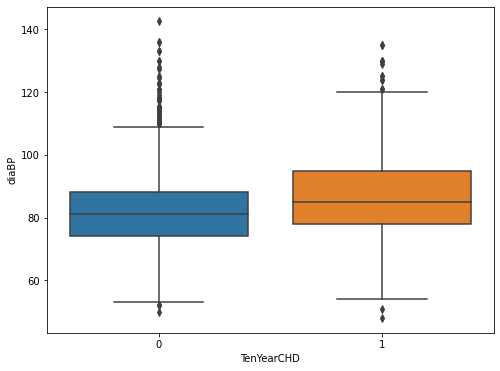

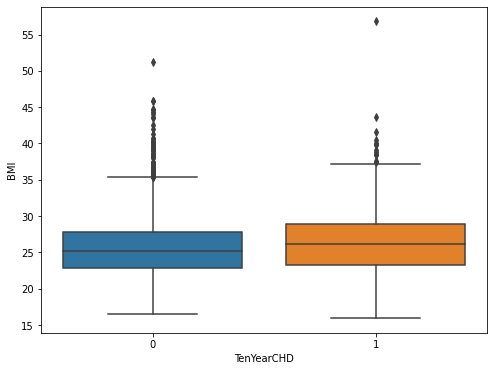

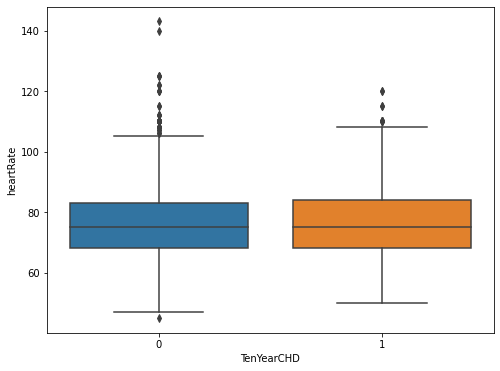

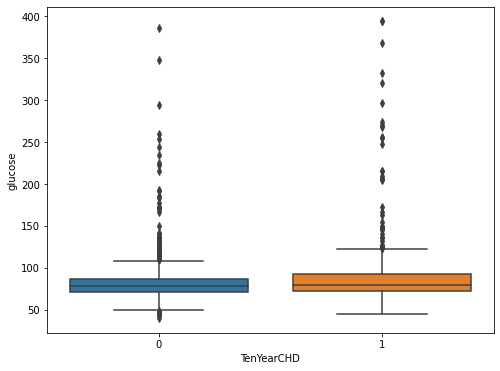

In [28]:
# plotting boxplot for continous features for each class of dependent feature.
for col in cts_features:
  plt.figure(figsize = (8,6))
  sbn.boxplot(x = df[dep_variable],y = df[col])

Average value of 'age', 'Cigsperday', 'SysBP', 'DiaBP' and 'BMI' is higher for people at risk of cardiovascular disease.

Percentage of people in each class of categorical features for each class of dependent variable.

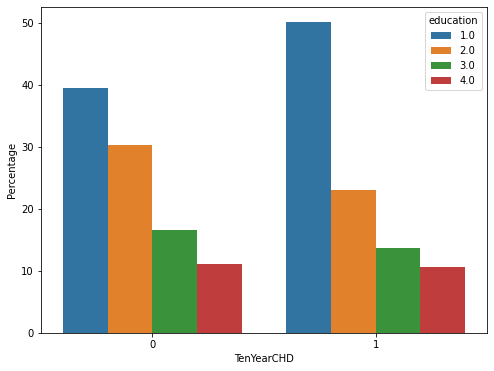

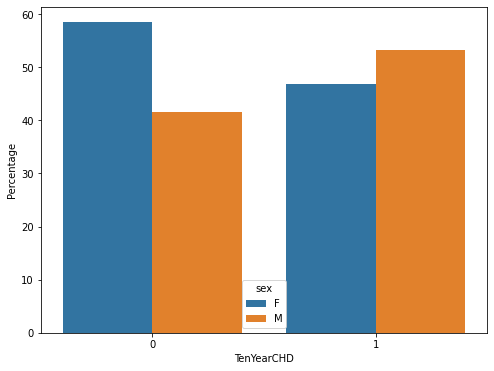

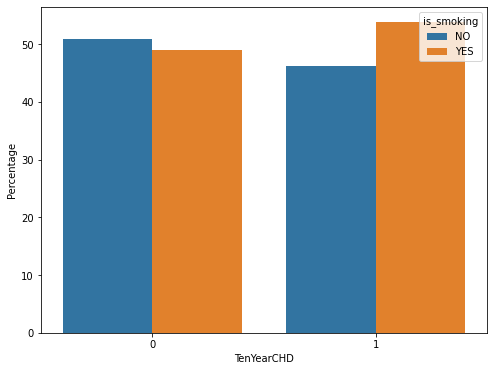

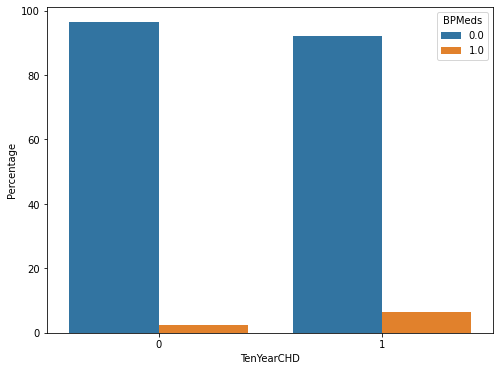

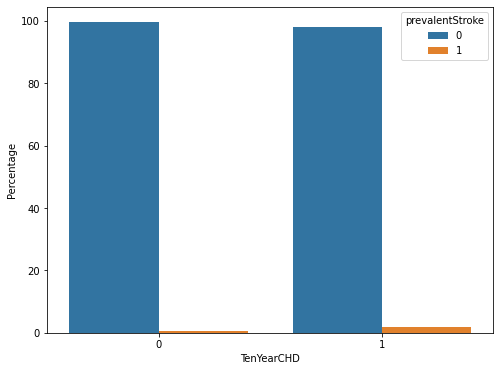

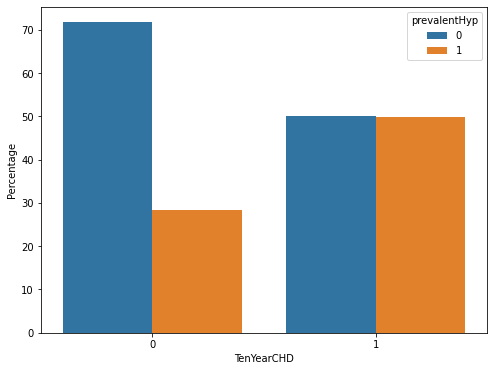

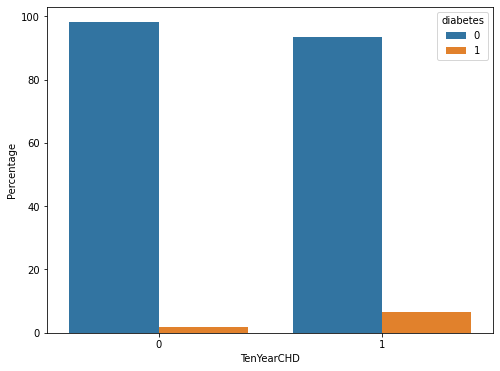

In [87]:

df_groupby = df.groupby(by = dep_variable)   # Grouping data by dependent variable
for col in cat_features:
  df_plot = pd.DataFrame((df_groupby[col].value_counts()/df_groupby['id'].count())*100).reset_index().rename(columns = {0:'Percentage'})
  # creating dataframe for each categorical variable with relative percentage.
  plt.figure(figsize = (8,6))
  sbn.barplot(x = df_plot[dep_variable], y = df_plot['Percentage'] , hue = df_plot[col])
  # plotting percentage wise barplot  

(1)Percentage distribution of education level is almost similar for both high risk and low risk patients. \
(2) More percentage of men are at high risk for getting cardiovascular disease. \
(3) Higher percentage of people who are smoking are at high risk. \
(4) For people at high risk of cardiovascular disease there is 50% chance that they had prevalent hypertension.


Out of people having 'diabetes', 'prevalentStroke' , 'BPMeds' how many are at risk of cardiac disease.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


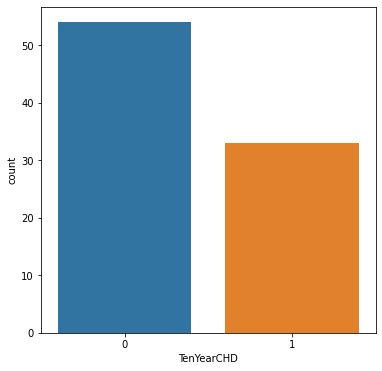

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


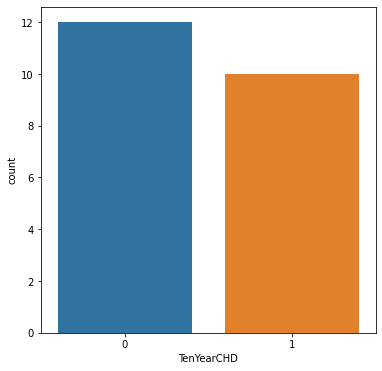

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


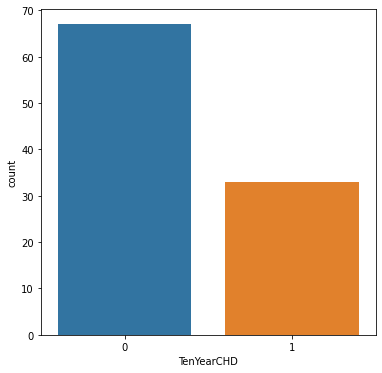

In [88]:
diabetes_pos = df[df['diabetes'] == 1]                # creating dataset for diabetes positive people.
hypertensive_people = df[df['prevalentStroke'] == 1]  # creating dataset for hypertensive people.
BPMeds_pos = df[df['BPMeds'] == 1]                    # creatinf dataset for people taking BP medicines.

# plotting countplot
for data_set in [diabetes_pos,hypertensive_people, BPMeds_pos]:
  plt.figure(figsize = (6,6))
  sbn.countplot(data_set[dep_variable])
  plt.show()

## Multivariate Analysis

In [90]:
seniors = df[df[]]

count    3390.000000
mean       49.542183
std         8.592878
min        32.000000
25%        42.000000
50%        49.000000
75%        56.000000
max        70.000000
Name: age, dtype: float64

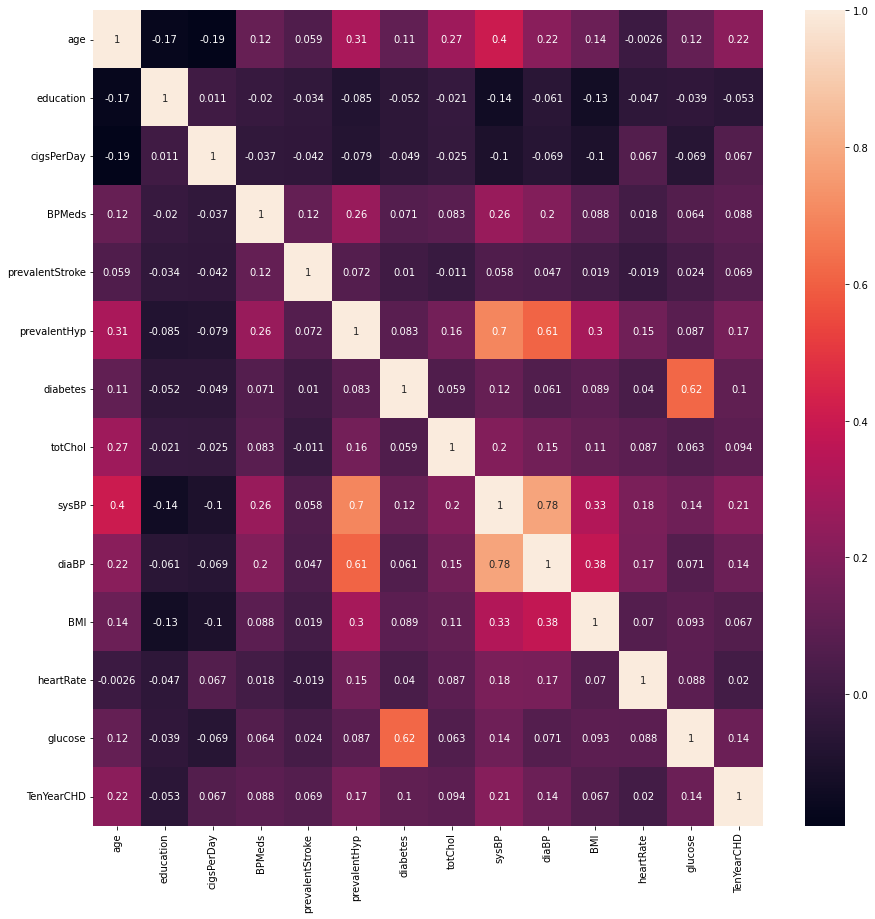

In [49]:
plt.figure(figsize = (15,15))
df_corr = df.corr()
sbn.heatmap(df_corr, annot = True)

Education has most weakest correlation with all features, we are dropping education for that.

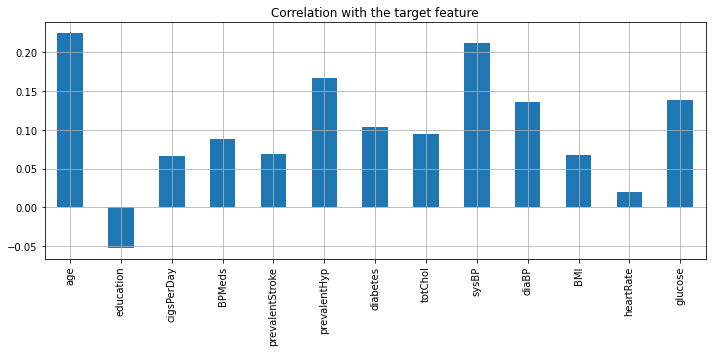

In [50]:
df.drop('TenYearCHD', axis=1).corrwith(df['TenYearCHD']).plot(kind='bar', grid=True, figsize=(10, 5), 
                                                        title="Correlation with the target feature")
plt.tight_layout()

In [51]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [52]:
df['sex'] = np.where(df['sex'] == 'M',1,0)
df['is_smoking'] = np.where(df['is_smoking'] == 'YES', 1,0)

In [53]:
df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [58]:
from sklearn.impute import KNNImputer, SimpleImputer

imp1 = KNNImputer(n_neighbors=5, weights="uniform")
imp2 = SimpleImputer(strategy = 'most_frequent')

In [59]:
df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [55]:
y1 = df['TenYearCHD']
x1 = df.drop(columns = ['TenYearCHD'])
x_train, x_test, y_train, y_test = train_test_split(x1,y1, test_size = 0.2, random_state = 0)

In [72]:
imp1_cols = ['cigsPerDay','totChol','BMI','heartRate','glucose']
imp2_cols = ['education','BPMeds']

imputed_data = imp1.fit_transform(x_train)  # impute all the missing data
df_temp = pd.DataFrame(imputed_data)
df_temp.columns = x_train.columns
x_train[imp1_cols] = df_temp[imp1_cols]  # update only the desired column

imputed_data = imp2.fit_transform(x_train)  # impute all the missing data
df_temp = pd.DataFrame(imputed_data)
df_temp.columns = df.columns
df[imp2_cols] = df_temp[imp2_cols]  # update only the desired column

In [70]:
x_test

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
1296,64,NaN,0,1,NaN,NaN,0,0,0,NaN,128.0,71.0,NaN,NaN,NaN
663,61,2.0,1,1,20.000000,0.0,0,0,0,160.00000,130.0,70.0,20.560000,60.000000,83.000000
648,58,1.0,1,0,9.086173,0.0,0,1,0,235.70187,139.0,96.0,25.724028,75.861041,81.344915
2715,46,NaN,1,0,NaN,NaN,0,1,0,NaN,136.5,92.0,NaN,NaN,NaN
1678,65,NaN,0,0,NaN,NaN,0,1,0,NaN,171.0,89.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,56,NaN,1,1,NaN,NaN,0,0,0,NaN,133.0,84.0,NaN,NaN,NaN
1959,64,NaN,0,0,NaN,NaN,0,1,0,NaN,149.5,84.0,NaN,NaN,NaN
817,48,NaN,1,0,NaN,NaN,0,0,0,NaN,116.0,82.0,NaN,NaN,NaN
3121,39,NaN,1,1,NaN,NaN,0,1,0,NaN,132.0,92.0,NaN,NaN,NaN


In [56]:
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = list(set(df.columns) - {dep_var})
mutual_info.sort_values(ascending = False)

ValueError: ignored

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x_train, y_train)

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

In [ ]:
df['TenYearCHD'].value_counts()

Imbalanced dataset

In [ ]:
dt1 = DecisionTreeClassifier(criterion='gini',random_state = 0)

dt1.fit(x_train,y_train)

In [ ]:
y_train_pred = dt1.predict(x_train)
y_train_pred_proba = dt1.predict_proba(x_train)[:,1]
y_pred = dt1.predict(x_test)
y_pred_proba = dt1.predict_proba(x_test)[:, 1]

In [ ]:
print(f"Train accuracy : {accuracy_score(y_train_pred,y_train)}")
print(f"Test accuracy : {accuracy_score(y_pred,y_test)}")

In [ ]:
confusion_matrix(y_train_pred,y_train)

In [ ]:
confusion_matrix(y_pred,y_test)

In [ ]:
roc_auc_score(y_test,y_pred_proba)

In [ ]:
roc_auc_score(y_train,y_train_pred_proba)

In [ ]:
RF1 = RandomForestClassifier(n_estimators = 1000,criterion = 'entropy', random_state = 0)

RF1.fit(x_train,y_train)

In [ ]:
y_train_pred = RF1.predict(x_train)
y_train_pred_proba = RF1.predict_proba(x_train)[:,1]
y_pred = RF1.predict(x_test)
y_pred_proba = RF1.predict_proba(x_test)[:, 1]

In [ ]:
print(f"Train accuracy : {accuracy_score(y_train_pred,y_train)}")
print(f"Test accuracy : {accuracy_score(y_pred,y_test)}")

In [ ]:
confusion_matrix(y_train_pred,y_train)

In [ ]:
confusion_matrix(y_pred,y_test)

In [ ]:
roc_auc_score(y_test,y_pred_proba)

In [ ]:
roc_auc_score(y_train,y_train_pred_proba)

In [ ]:
GB1 = GradientBoostingClassifier(n_estimators = 1000,random_state = 0)

GB1.fit(x_train,y_train)

In [ ]:
y_train_pred = GB1.predict(x_train)
y_train_pred_proba = GB1.predict_proba(x_train)[:,1]
y_pred = GB1.predict(x_test)
y_pred_proba = GB1.predict_proba(x_test)[:, 1]

In [ ]:
print(f"Train accuracy : {accuracy_score(y_train_pred,y_train)}")
print(f"Test accuracy : {accuracy_score(y_pred,y_test)}")

In [ ]:
confusion_matrix(y_train_pred,y_train)

In [ ]:
confusion_matrix(y_pred,y_test)

In [ ]:
roc_auc_score(y_test,y_pred_proba)

In [ ]:
roc_auc_score(y_train,y_train_pred_proba)

In [ ]:
svc1 = SVC(kernel = 'sigmoid',probability = True)

svc1.fit(x_train,y_train)

In [ ]:
y_pred = svc1.predict(x_test)
y_pred_train = svc1.predict(x_train)
y_train_pred_proba = svc1.predict_proba(x_train)[:,1]
y_pred_proba = svc1.predict_proba(x_test)[:, 1]

In [ ]:
print(f"Train accuracy : {accuracy_score(y_train_pred,y_train)}")
print(f"Test accuracy : {accuracy_score(y_pred,y_test)}")

In [ ]:
confusion_matrix(y_train_pred,y_train)

In [ ]:
confusion_matrix(y_pred,y_test)

In [ ]:
roc_auc_score(y_test,y_pred_proba)

In [ ]:
roc_auc_score(y_train,y_train_pred_proba)